In [10]:
from libraries import *

randomly choose K (initial centroids)
- while True:
    - create K clusters by assigning each data point to closest centroid
    - compute K new centroids by computing mean of all assigned data points in each cluster
    - if centroid stops changing:
        - break

In [3]:
from sklearn import datasets

In [118]:
n_samples = 60
random_state = 10
centers = 3
n_features = 2

X, y = datasets.make_blobs(n_samples=n_samples,
                           random_state=random_state,
                           n_features=n_features)
df_X = pd.DataFrame({
    'x': X[:,0],
    'y': X[:,1]
})
df_X.head()

,x,y
0,2.987718,7.443729
1,-0.325844,-4.655858
2,3.719148,3.557522
3,2.310466,4.854172
4,-0.952769,-5.034316


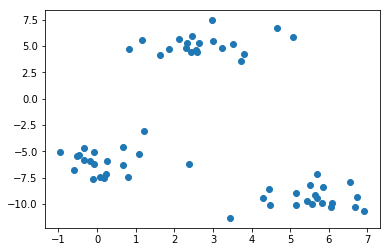

In [119]:
plt.scatter(df_X['x'], df_X['y'])

In [120]:
min_num = min((min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])))
max_num = max((min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])))

In [125]:
k = 3

# centroiods[i] = [x,y]
centroids = {
    i+1: [round(np.random.uniform(min_num, max_num), 2),
          round(np.random.uniform(min_num, max_num), 2)]
    for i in range(k)
}
print(centroids)

{1: [3.48, -9.77], 2: [5.71, -5.71], 3: [-2.63, 3.83]}


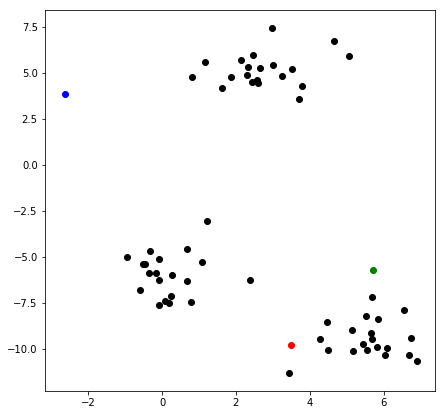

In [126]:
fig = plt.figure(figsize=(7,7))
plt.scatter(df_X['x'], df_X['y'], color='k')

colormap = {1: 'r', 2:'g', 3:'b'}

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colormap[i])

In [127]:
# Assignment of data points to clusters
def assigment(df, centroids):
    for i in centroids.keys():
        # distance: sqrt((x1-x2)**2+(y1-y2)**2)
        df['Distance_from_{}'.format(i)] = (
        np.sqrt(
        (df['x'] - centroids[i][0])**2
        + (df['y'] - centroids[i][1])**2
        )
        )
    #print(df)
    distance_columns = ['Distance_from_{}'.format(i) for i in centroids.keys()]
    df['Closest'] = df.loc[:, distance_columns].idxmin(axis=1)
    df['Closest'] = df['Closest'].map(lambda x: int(x.lstrip('Distance_from_')))
    df['color'] = df['Closest'].map(lambda x: colormap[x])
    return df

df = assigment(df_X, centroids)
df.head()

,x,y,Distance_from_1,Distance_from_2,Distance_from_3,Closest,color
0,2.987718,7.443729,17.220766,13.432475,6.679655,3,b
1,-0.325844,-4.655858,6.374864,6.127203,8.793118,2,g
2,3.719148,3.557522,13.329667,9.478948,6.354992,3,b
3,2.310466,4.854172,14.670863,11.097683,5.045506,3,b
4,-0.952769,-5.034316,6.486613,6.696943,9.021596,1,r


{1: [3.48, -9.77], 2: [5.71, -5.71], 3: [-2.63, 3.83]}


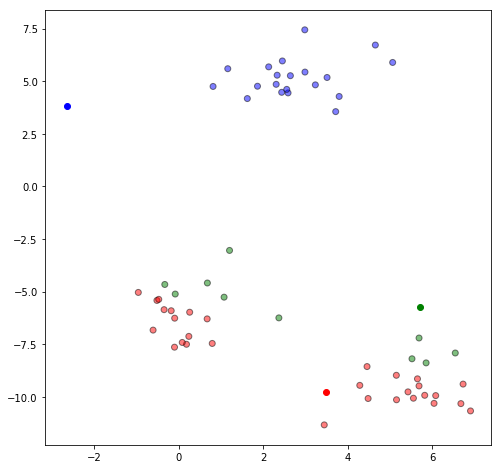

In [128]:
fig = plt.figure(figsize=(8,8))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolors='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colormap[i])
print(centroids)

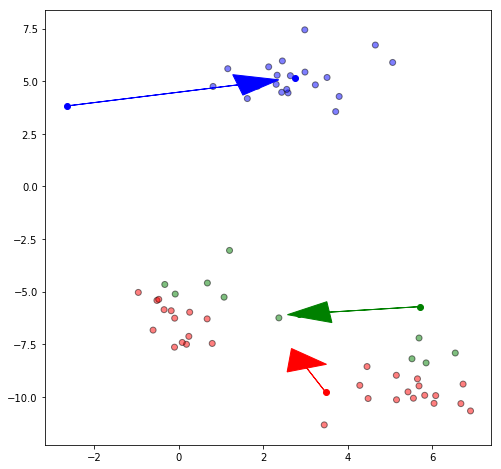

In [129]:
# centroid update state
import copy
def update_centroids(df, centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['Closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['Closest'] == i]['y'])
    return centroids
old_centroids = copy.deepcopy(centroids)
centroids = update_centroids(df, centroids)

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolors='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colormap[i])

for i in old_centroids.keys():
    plt.scatter(*old_centroids[i], color=colormap[i])

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy,
             head_width=1, head_length=1, fc=colormap[i], ec=colormap[i])

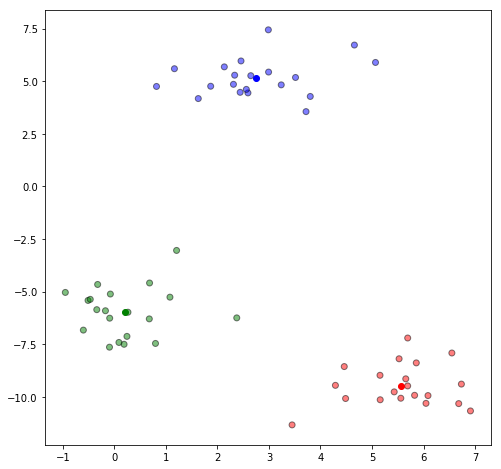

In [131]:
while True:
    closest_centroids = df['Closest'].copy(deep=True)
    df = assigment(df, centroids)
    centroids = update_centroids(df, centroids)
    if closest_centroids.equals(df['Closest']):
        break

fig = plt.figure(figsize=(8,8))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolors='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colormap[i])

## K-means via sklearn 

In [135]:
X, y = datasets.make_blobs(n_samples=n_samples,
                           random_state=random_state,
                           n_features=n_features)
df_X = pd.DataFrame({
    'x': X[:,0],
    'y': X[:,1]
})
df_X.head()

,x,y
0,2.987718,7.443729
1,-0.325844,-4.655858
2,3.719148,3.557522
3,2.310466,4.854172
4,-0.952769,-5.034316


In [138]:
from sklearn.cluster import KMeans

kmns = KMeans(n_clusters=3)
kmns.fit(df_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [140]:
labels = kmns.predict(df_X)
centroids = kmns.cluster_centers_
print(labels)
print(centroids)

[1 2 1 1 2 1 1 0 1 1 2 0 1 2 2 0 1 2 2 0 2 1 2 1 2 0 1 2 0 0 0 1 1 1 2 2 1
 0 0 0 0 0 0 1 1 0 1 0 1 2 0 2 0 2 2 2 0 2 2 0]
[[ 5.56276004 -9.45842037]
 [ 2.74662583  5.16113403]
 [ 0.19753256 -5.94693249]]


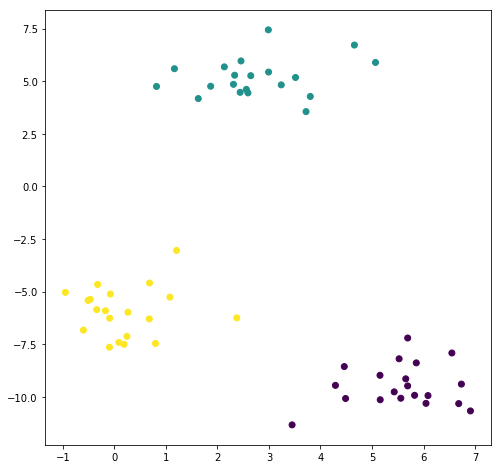

In [150]:
fig = plt.figure(figsize=(8,8))
plt.scatter(df['x'], df['y'], c=labels)